# Momentum Based Gradient

    It will calculate exponentially weighted average of the gradient. It will eleminate the oscillation

It will generate momentum speed by calculating exponentially weighted average

TODO
1. Show exponential weighted average calculation with graph
2. Show calculation of beta value
3. diff between sgd and momentum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = [121, 109, 120, 110, 121, 123, 127, 125, 130, 127, 133, 135, 132, 136, 131, 137, 134, 139, 135, 140, 137]  
y = []

In [2]:
def fun(x):
    return x ** 2

def der_fun(x):
    return 2 * x + 0.00001

def grad_dec(x, lr):
    return x - (lr * der_fun(x))

In [3]:
x = range(-100,101)
y = [fun(i) for i in x]

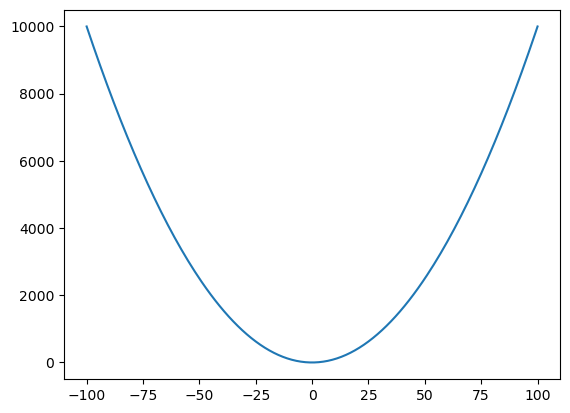

In [4]:
plt.plot(x,y)
plt.show()

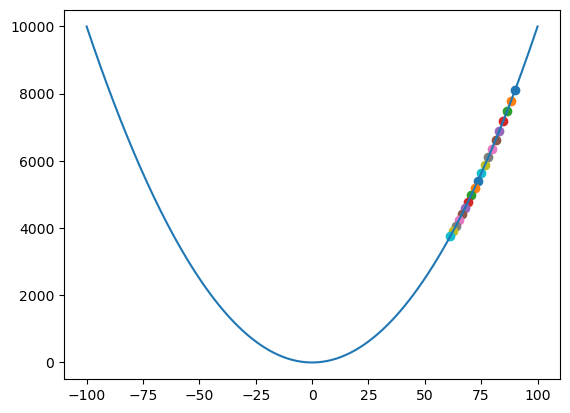

In [6]:
# Without momentum
x1 = 90
y1 = fun(x1)

plt.plot(x,y)
for i in range(20):
    plt.scatter(x1,y1)
    x1 = grad_dec(x1,0.01)
    y1 = fun(x1)
plt.show()